<a href="https://colab.research.google.com/github/JunoJames-JJ/AI-ML-Learning/blob/main/NLP_Prep_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing 1

1. AI : *Machine acts intelligently.*
2. ML : *Learns patterns from data.*
3. DL : *Neural network with many layers : effective for image recognition, speech and natural language tasks.*
4. NLP : *Understand and generate human language. Powering applications like chatbots, translation, sentiment analysis and speech recognition.*

## AI Categories

*   Discriminative
*   Generative


Discriminative : Predicts outcome from existing data.

*Example* : Predicts whether a tumor is benign or malignant, Predicts if a stock price will go up or down.


Generative : Creates new content that looks like the original.

*Example* : Creates synthetic medical scans to help train doctors or AI systems.

NLP + Discriminative AI : Analyze or predict properties of text.

*Example* : Sentiment analysis -> Predict a review is +ve or -ve, Spam detection, NER : Named Entity Recognition -> Identify entities like names, places, or dates in text.

NLP + Generative AI : Producing human like language.

*Example* : Text generation -> poem, article, Chatbots/assistants.

# Word Embedding

* Vector representing a word (Dense vector).
* Capture semantic meaning.
* Unknown words are handled with a special token or ignored, or given a 0 vector.
* Enables analogy tasks:

king - man + woman ≈ queen

paris - france + italy ≈ rome


*1. Dense vectors are continuous, low-dimensional arrays of numbers where most elements are non-zero.*

*2. Sparse vectors, which contain many zeros.*

*3. Capturing semantics means representing the meaning of data — especially text, images, or audio — in a way that models can understand and use for reasoning, similarity, or prediction. The actual meaning of a word, so similar words are close together. Example: "cat" is closer to "dog" than "car" in vector space.*


## Why do we use Word Embedding?

* Integer IDs like 0,1,2,. . . are arbitrary labels.
* Numeric distance between IDs is meaningless.
* After training, words that are similar in meaning have vectors that are close together in space (Cosine similarity).

*A way to measure how similar two vectors are by looking at the angle between them, not the distance.*

*Range: -1 (opposite) → 0 (uncorrelated) → 1 (exactly same direction)*

* Enables generalization and analogies.

*Generalization: The model can understand relationships, even if it hasn’t seen the exact example before.*

*Analogies: Doing vector math with word vectors to solve “X is to Y as A is to ?” puzzles.*

## How can we create word vectors (Word Embeddings)?

* One-hot vectors
* Count-based methods
* Word2Vec
* GloVe
* Transformers

*Word vector = Word embedding: Yes, they basically mean the same thing — a way to represent a word as numbers.*

*Zero semantic or contextual info: It does not tell the computer anything about the meaning of the word or how it’s used in sentences.*

*Sparse identifier: It’s mostly zeros, with a single 1 showing which word it is.*


### One-hot vectors

→ Sparse, no semantic info, just marks the word.

*One-hot vectors are big, mostly zeros, and only say “this is the word,” without showing meaning or context.*

Problem: one-hot vectors don’t tell you anything about meaning or context.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# sklearn.preprocessing -> module for preparing/transforming data.
# LabelBinarizer from scikit-learn -> convert words into one-hot vectors.

vocab = ["the", "cat", "sat", "on", "mat", "dog", "log"]
word = "cat"

lb = LabelBinarizer()
lb.fit(vocab)

# lb.fit(vocab) -> tells the encoder which words exist in the vocabulary.

one_hot = lb.transform([word])

print("vocab order:", lb.classes_)
print("one_hot for 'cat' :", one_hot)

vocab order: ['cat' 'dog' 'log' 'mat' 'on' 'sat' 'the']
one_hot for 'cat' : [[1 0 0 0 0 0 0]]


sklearn -> scikit-learn
* Python library for machine learning.
* It provides tools to:
  1. Preprocess data (like one-hot encoding, scaling, etc.)
  2. Build ML models (like regression, classification, clustering)
  3. Evaluate models (accuracy, confusion matrix, etc.)

### Distributional Semantics

- Words that appear in similar contexts usually have similar meanings.

This is exactly what we want embeddings to capture: meaning comes from context.

*Example* : If we see “chai” in contexts like “cup of chai” or “chai is hot”, we
realize it’s similar to “tea” or “coffee.”

## How to capture word contexts in vectors?

### Count-Based Methods

- Count-Based Methods = capturing word context via numbers
- Count-based methods generally use how often words appear, either globally or locally.

- Count-based methods implement distributional semantics.

- How? - By creating a **co-occurrence matrix:**

    * Rows = target words
    * Columns = context words (words nearby in text)
    * Values = counts of how often target & context appear together

This matrix encodes context information → now the vectors are not just IDs; they reflect meaning.

Distributional Semantics -> It’s a bridge from one-hot (meaningless) to semantic embeddings (meaningful).

**Co-occurrence Matrix**

- Focus: Word × Word → How often each word appears near other words (local context).
- Captures semantic similarity between words: similar rows → similar meaning.

In [ ]:
# count-based co-occurrence matrix
# It captures word context: words appearing near each other have higher counts

import numpy as np
from collections import defaultdict

# NumPy -> array/matrix operations
# defaultdict -> Special feature -> if you try to access a key that doesnt exist, it automatically created it with a default value insted of raing a key error.


corpus = [
    ["the", "cat", "drinks", "milk"],
    ["the", "dog", "drinks", "water"]
]

window_size = 1

# window_size = 1 -> we only look 1 word to the left and 1 word to the right of the target word.

vocab = sorted(set([w for doc in corpus for w in doc]))

# set() -> removes duplicates, sorted() -> keeps consistent order.

word2idx = {w: i for i, w in enumerate(vocab)}

co_matrix = np.zeros((len(vocab), len(vocab)), dtype = int)

for doc in corpus:
  for i, word in enumerate(doc):
    idx = word2idx[word]
    for j in range(max(i - window_size, 0), min(i + window_size + 1, len(doc))):
      if i != j:
        context = doc[j]
        co_matrix[idx, word2idx[context]] += 1

print("Vocabulary: ", vocab)
print("Co-occurance matrix: \n", co_matrix)

Vocabulary:  ['cat', 'dog', 'drinks', 'milk', 'the', 'water']
Co-occurance matrix: 
 [[0 0 1 0 1 0]
 [0 0 1 0 1 0]
 [1 1 0 1 0 1]
 [0 0 1 0 0 0]
 [1 1 0 0 0 0]
 [0 0 1 0 0 0]]


**Bag of Words (BoW)**

- Focus: Document × Word → How often each word appears in a document.
- Ignores word order, syntax, and grammar.
- Sparse vectors: mostly zeros, just mark presence/counts of words.

**Variants of Bag of Words**

1. Counts: How many times the word appears. “Count of word in document.”
2. Binary: 1 if the word appears, 0 if not. “Mark 1 if word exists, else 0.”
3. TF: Term Frequency. Measures how often a word appears within a single document.
4. IDF: How rare a word accross the full set of soc, higher weigh to words that appear in fewer docs.
3. TF-IDF: Adjust count by importance (rare words matter more). “Count weighted by how rare the word is across documents.”

*Common words like the, and, is appear everywhere low IDF low
weight. Specialized words that occur frequently in just one document
and high IDF high weight*


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# CountVectorizer → creates Count or Binary vectors
# TfidfVectorizer → creates TF, IDF, or TF–IDF vectors

docs = ["The cat sat on the mat", "The dog sat on the log"]

# --- Raw Counts ---
count_vec = CountVectorizer()
X_counts = count_vec.fit_transform(docs)

print("Feature order:\n", count_vec.get_feature_names_out())
print("Raw counts: \n", X_counts.toarray())

print("Vocabulary mapping:", count_vec.vocabulary_)

Feature order:
 ['cat' 'dog' 'log' 'mat' 'on' 'sat' 'the']
Raw counts: 
 [[1 0 0 1 1 1 2]
 [0 1 1 0 1 1 2]]
Vocabulary mapping: {'the': 6, 'cat': 0, 'sat': 5, 'on': 4, 'mat': 3, 'dog': 1, 'log': 2}


In [ ]:
# --- Binary presence ---
binary_vec = CountVectorizer(binary=True)
X_binary = binary_vec.fit_transform(docs)

print("\nBinary presence:\n", X_binary.toarray())



Binary presence:
 [[1 0 0 1 1 1 1]
 [0 1 1 0 1 1 1]]


In [ ]:
# --- Term Frequency (TF) ---
tf_vec = TfidfVectorizer(use_idf=False, norm="l1")

# l1 → sum of values = 1
# l2 → Euclidean length = 1
# None → raw vector

X_tf = tf_vec.fit_transform(docs)

print("\nTF:\n", X_tf.toarray())


TF:
 [[0.16666667 0.         0.         0.16666667 0.16666667 0.16666667
  0.33333333]
 [0.         0.16666667 0.16666667 0.         0.16666667 0.16666667
  0.33333333]]


In [ ]:
# Raw TF (no normalization)
tf_vec = TfidfVectorizer(use_idf=False, norm=None)
X_tf = tf_vec.fit_transform(docs)

print("\n  Raw TF:\n", X_tf.toarray())


  Raw TF:
 [[1. 0. 0. 1. 1. 1. 2.]
 [0. 1. 1. 0. 1. 1. 2.]]


In [ ]:
# IDF
idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
idf_vec.fit(docs)  # fit computes the IDF for each term

print("Vocabulary:", idf_vec.get_feature_names_out())
print("IDF values:")
for term, val in zip(idf_vec.get_feature_names_out(), idf_vec.idf_):
    print(f"{term}: {val:.3f}")

Vocabulary: ['cat' 'dog' 'log' 'mat' 'on' 'sat' 'the']
IDF values:
cat: 1.405
dog: 1.405
log: 1.405
mat: 1.405
on: 1.000
sat: 1.000
the: 1.000


In [ ]:
# TF–IDF
tfidf_vec = TfidfVectorizer(smooth_idf=True, norm=None)
X_tfidf = tfidf_vec.fit_transform(docs)  # combines TF * IDF

print("\nTF–IDF matrix:\n", X_tfidf.toarray())
print("\nVocabulary:", tfidf_vec.get_feature_names_out())


TF–IDF matrix:
 [[1.40546511 0.         0.         1.40546511 1.         1.
  2.        ]
 [0.         1.40546511 1.40546511 0.         1.         1.
  2.        ]]

Vocabulary: ['cat' 'dog' 'log' 'mat' 'on' 'sat' 'the']


### N-grams: Extending BoW

- BoW (Bag of Words) usually treats each word independently.

*Example*: "The cat sat" → [The, cat, sat]

- Problem: ignores order or word sequences.

- Solution: N-grams – look at sequences of words:

    1. Unigram → single words (the, cat, sat) → standard BoW
    2. Bigram → 2-word sequences (the cat, cat sat)
    3. Trigram → 3-word sequences (the cat sat)

- Trade-off:
    * Captures some word order/context
    * Increases vocabulary size → more sparse vectors

### What BoW is NOT

- BoW ignores most word order (except what you capture in N-grams)
- BoW does not capture semantics (meaning of words)
- "bank" in "river bank" vs "money bank" → BoW treats “bank” the same
- BoW does not learn dense embeddings like Word2Vec/CBOW/Skip-gram
- BoW → sparse vector (lots of zeros, just counts or weights)
- Word2Vec/GloVe/Transformers → dense vector, meaning is encoded

In [ ]:
# N-grams

from sklearn.feature_extraction.text import CountVectorizer

docs = ["the cat sat"]

cv1= CountVectorizer(ngram_range=(1, 1)) #unigrams
print("unigrams:", cv1.fit(docs).get_feature_names_out())
# ['cat', 'sat', 'the']

cv2= CountVectorizer(ngram_range=(1, 2)) #unigrams + bigrams
print("unigrams + bigrams:", cv2.fit(docs).get_feature_names_out())
# ['cat', 'cat sat', 'sat', 'the', 'the cat']

cv3= CountVectorizer(ngram_range=(2, 2)) #only bigrams
print("only bigrams:", cv3.fit(docs).get_feature_names_out())
# ['cat sat', 'the cat']

cv4= CountVectorizer(ngram_range=(2, 3))
print("trigram: ",cv4.fit(docs).get_feature_names_out())
# ['cat sat' 'the cat' 'the cat sat']

cv5= CountVectorizer(ngram_range=(3, 3))
print("trigram +: ",cv5.fit(docs).get_feature_names_out())
#  ['the cat sat']

unigrams: ['cat' 'sat' 'the']
unigrams + bigrams: ['cat' 'cat sat' 'sat' 'the' 'the cat']
only bigrams: ['cat sat' 'the cat']
trigram:  ['cat sat' 'the cat' 'the cat sat']
trigram +:  ['the cat sat']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

docs = ["the cat sat", "the dog ran"]

# --- CountVectorizer with bigrams only ---
cv3 = CountVectorizer(ngram_range=(2, 2))
X_counts = cv3.fit_transform(docs)
print("Bigrams:", cv3.get_feature_names_out())
print("Counts:\n", X_counts.toarray())

# --- TF-IDF with bigrams only ---
tfidf_vec = TfidfVectorizer(ngram_range=(2, 2), smooth_idf= True, norm="l2")
X_tfidf = tfidf_vec.fit_transform(docs)
print("\nBigrams:", tfidf_vec.get_feature_names_out())
print("TF-IDF:\n", X_tfidf.toarray())


Bigrams: ['cat sat' 'dog ran' 'the cat' 'the dog']
Counts:
 [[1 0 1 0]
 [0 1 0 1]]

Bigrams: ['cat sat' 'dog ran' 'the cat' 'the dog']
TF-IDF:
 [[0.70710678 0.         0.70710678 0.        ]
 [0.         0.70710678 0.         0.70710678]]


## Word2Vec: Predictive Word Embeddings

- Goal: Learn dense vectors for words such that words in similar contexts are close together.
- How: Predict surrounding words from a center word (or vice versa).
- Training: Vectors are model parameters updated step by step with each prediction.

*Example* : Sentence: "The cat likes to drink milk"

Window size = 2 → for "drink", context = ["to", "milk"]

Training pair: (drink → milk), (drink → to)

Step-by-step update pushes vectors closer for words that appear together frequently.

**Word2Vec trains word vectors by predicting surrounding words, so words with similar contexts get similar vectors.**

### Variants:

1. Skip-Gram: center word → predict surrounding words

2. CBOW (Continuous Bag of Words): context → predict center word

Pros: Dense embeddings, context-aware, capture semantics, suitable for neural networks.

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 46.4 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec
sentences = [
    ["the","cat","sat","on","the","mat"],
    ["the","dog","sat","on","the","log"],
]

# Word2Vec learns embeddings from this tokenized corpus.

w2v_sg = Word2Vec(
    sentences,
   vector_size=100,   # dimension of word vectors
    window=5,         # context window (how many words to look left & right)
    min_count=1,      # ignore words appearing less than this
    sg=1,             # 1=Skip-gram, 0=CBOW
    negative=10,      # negative sampling (common for Skip-gram)
    epochs=10,        # number of training iterations
    workers=1,        # parallel threads
    seed=42           # reproducibility
)


# --- use the vectors ---
print("vector for 'cat' (first 5 dims):", w2v_sg.wv["cat"][:5])
print("similarity(cat, dog):", w2v_sg.wv.similarity("cat", "dog"))
print("most similar to 'cat':", w2v_sg.wv.most_similar("cat", topn=3))

vector for 'cat' (first 5 dims): [ 0.00232568  0.00557993  0.00478086 -0.00730896  0.0065211 ]
similarity(cat, dog): -0.14846532
most similar to 'cat': [('on', 0.025957388803362846), ('sat', -0.008650765754282475), ('the', -0.01076418161392212)]


- Gensim is a Python library for NLP (Natural Language Processing) that specializes in unsupervised learning of text representations, like word embeddings, topic modeling, and document similarity.

- Skip-gram: predicts context words given a center word.

- window=5: considers 5 words on left + right as context.

- vector_size=100: output embedding is 100-dimensional.

- negative=10: improves training efficiency using negative sampling.

## GloVe

**Count-Based Methods:**

- Capture global statistics (how often words appear together across the corpus).
- Problem: Matrices are large and sparse → hard to use directly.

**Word2Vec (Skip-Gram / CBOW):**

- Learns local patterns by predicting nearby words (context window).
- Strength: Captures semantic similarity.
- Weakness: Ignores global co-occurrence across the whole corpus.

**GloVe (Global Vectors):**

- Idea: Combine global + local info.
- How:
    * Build a co-occurrence matrix like count-based methods.
    * Factorize it using a predictive objective (like Word2Vec).

*Example* : “ice” and “steam” both co-occur with “water” (global stats). Factorization places “ice” close to “cold” and “steam” close to “hot”.

Takeaway:
GloVe is a bridge between count-based methods and predictive embeddings.

## Transformers

- Problem with static embeddings (Word2Vec / GloVe):

One vector per word type, ignores context.

Example: “bank” in “river bank” vs. “bank loan” → same vector in Word2Vec/GloVe.

- Transformers (BERT, GPT, T5):

Vectors depend on sentence context → dynamic embeddings.

Example:

“She sat by the river bank” → “bank” vector related to water.

“He applied for a bank loan” → “bank” vector related to finance.

Takeaway:
Transformers solve polysemy and produce contextual embeddings.

Popular Transformer models:
* BERT (encoder)
* GPT (decoder)
* T5 (encoder–decoder

In [ ]:
import gensim.downloader
model = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
model["tower"]

array([ 1.1474e+00,  1.1811e+00,  7.4556e-01, -5.9101e-02,  5.0499e-01,
       -7.0449e-01, -3.2136e-01, -4.5390e-01, -4.5763e-01, -7.5341e-01,
       -3.3511e-01, -2.4975e-02, -5.0192e-01,  6.3773e-01, -8.3059e-01,
        8.3565e-01, -2.4701e-01,  3.2421e-01, -1.1103e+00, -2.1335e-02,
        6.8717e-01, -3.9340e-01, -1.6390e+00, -5.0493e-01, -1.6684e-01,
       -6.7649e-01, -3.1798e-01,  8.8503e-01, -3.1552e-02, -1.5608e-01,
        1.9805e+00, -1.1870e+00,  8.3342e-01, -1.8369e-01, -2.6691e-01,
        1.1619e-01,  1.1023e+00, -3.5937e-01,  2.5015e-02, -4.0615e-02,
        3.0681e-01, -4.1076e-01,  8.4586e-02,  2.2475e-01, -5.0955e-01,
        6.5819e-01, -1.2432e-01, -1.4039e+00,  1.6178e-04, -5.2529e-01],
      dtype=float32)

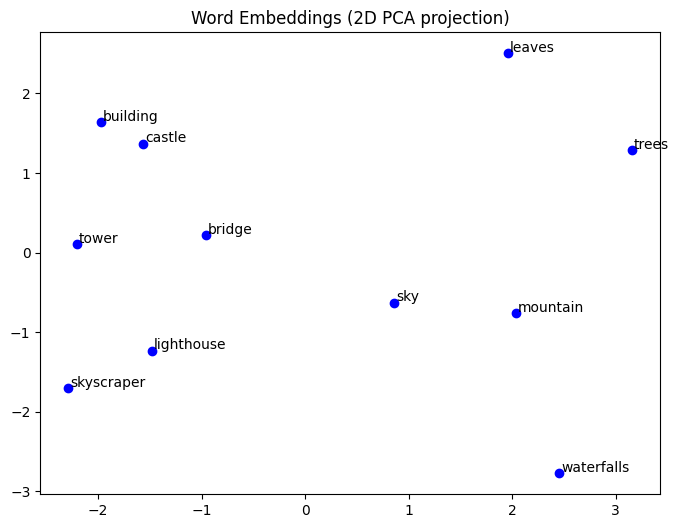

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gensim.downloader


# Load model
model = gensim.downloader.load("glove-wiki-gigaword-50")

# Pick some words to compare
words = ["tower", "skyscraper", "building", "lighthouse", "castle", "bridge", "sky", "mountain", "waterfalls", "trees", "leaves"]

vectors = [model[word] for word in words]

pca=PCA(n_components=2)
reduced=pca.fit_transform(vectors)


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], color = "blue")

for i, word in enumerate(words):
    plt.text(reduced[i, 0] + 0.02, reduced[i, 1] + 0.02, word)

plt.title("Word Embeddings (2D PCA projection)")
plt.show()
